# <font color=#800000>410821312 張宸瑋</font>
## Midterm
<b>The general objective is to detect blue cursor, yellow timer, and human skin from input video. Your output should be similar to midterm_demo.mp4. Please complete steps 1-10 in one single code cell, steps 11-12 in another markdown cell, and upload your Jupyter notebook file (*.ipynb). The whole process can be divided to the following steps:</b>
1. (5pts) Input images from video file WiiPlay.mp4 with the same level number as the last two digits of your student id, and show the images in the "input" window.
2. (5pts) Use <i>cv2.cvtColor()</i> to convert images from BGR to HSV format.
3. (10pts) Use <i>cv2.createTrackbar()</i> to create six trackbars (HueMin, HueMax, SatMin SatMax, ValMin, ValMax), and use <i>cv2.getTrackbarPos()</i> to get the current value of each trackbar.
4. (10pts) Use <i>cv2.threshold()</i> or <i>cv2.inRange()</i> to apply double thresholding to each channel (Hue, Sat, Val) based on current values of the six trackbars
5. (10pts) Apply morphological filters to remove noise (outliers & holes), and show the detected regions in the "test" window..
6. (10pts) Find out the best color range to detect <b>blue cursor</b>, apply these thresholds, and show the detected regions in the "cursor" window.
7. (10pts) Find out the best color range to detect <b>yellow timer</b>, apply these thresholds, and show the detected regions in the "timer" window.
8. (10pts) Find out the best color range to detect <b>human skin</b>, apply these thresholds, and show the detected regions in the "skin" window.
9. (10pts) Use <i>cv2.connectedComponents()</i> and <i>cv2.putText()</i> to count and display how many skin regions in each frame.
10. (10pts) Show each individual skin region using different color.
11. (5pts) Any comments regarding the midterm? Which steps you believe you have completed? Which steps bother you?
12. (5pts) Any comments regarding the classes up to now? pace too fast or slow? quiz too hard or simple? prefer C or Python?
 

In [1]:
import cv2
import numpy as np


def passfunc(pos):
    pass


cap = cv2.VideoCapture('WiiPlay.mp4')

time_length = 210
fps=30
frame_seq = 3840
out_size = (480, 270)

cap.set(cv2.CAP_PROP_POS_FRAMES , frame_seq);

if not cap.isOpened():
    raise IOError("Cannot open the video file")


#6 Trackbar
cv2.namedWindow('Test')
cv2.createTrackbar('HueMin', 'Test',  0, 255, passfunc)
cv2.createTrackbar('HueMax', 'Test',  0, 255, passfunc) 
cv2.createTrackbar('SatMin', 'Test',  0, 255, passfunc) 
cv2.createTrackbar('SatMax', 'Test',  0, 255, passfunc) 
cv2.createTrackbar('ValMin', 'Test',  0, 255, passfunc) 
cv2.createTrackbar('ValMax', 'Test',  0, 255, passfunc) 

#color for skin
a = []
colorforskin = [1,64,128,192,255]
for i in range(100): 
    color = tuple(np.random.choice(colorforskin, size=3))
    if color in a:
        continue
    else:
        a.append(color)
    
kernel = np.ones((5, 5), np.uint8)
se1 = cv2.getStructuringElement(cv2.MORPH_RECT, (10,12))

k = 0
while True:
    ret, frame = cap.read()
    if ret == False:
        break
    #level 12 - 13
    k+=1
    if k== 250:
        break
    cur_frame = cv2.resize(frame, out_size, 0, 0, interpolation=cv2.INTER_AREA)
    cv2.imshow('Input', cur_frame)
    
    # current values of the six trackbars
    cur_frame = cv2.cvtColor(cur_frame, cv2.COLOR_BGR2HSV)
    HueMin = cv2.getTrackbarPos('HueMin', 'Test')
    HueMax = cv2.getTrackbarPos('HueMax','Test')
    SatMin = cv2.getTrackbarPos('SatMin','Test')
    SatMax = cv2.getTrackbarPos('SatMax', 'Test')
    ValMin = cv2.getTrackbarPos('ValMin','Test')
    ValMax = cv2.getTrackbarPos('ValMax','Test')
     
    #hsv frame
    #cv2.imshow('test++', cur_frame)
    
    #test frame
    mask = cv2.morphologyEx(cur_frame, cv2.MORPH_CLOSE, kernel)
    img_closing = cv2.inRange(mask, (HueMin,SatMin,ValMin), (HueMax,SatMax,ValMax))
    cv2.imshow('Test', img_closing)
    
    #blue cursor
    blue = cv2.inRange(cur_frame, (101,101,65), (126,255,217))
    blue = cv2.morphologyEx(blue, cv2.MORPH_CLOSE, kernel)
    cv2.imshow('cursor', blue)
    
    #yellow time
    time = cv2.morphologyEx(cur_frame, cv2.MORPH_CLOSE, kernel)
    time = cv2.inRange(cur_frame, (16, 131, 204), (33, 255, 255))
    cv2.imshow('timer', time)
    
    #people
    people = cv2.morphologyEx(cur_frame, cv2.MORPH_CLOSE, kernel)
    people = cv2.inRange(people, (5, 47, 9), (19, 255, 223))
    people = cv2.morphologyEx(people, cv2.MORPH_OPEN, se1)
    cv2.imshow('skin', people)
    
    #people w color 
    ret, binary = cv2.threshold(people, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT, (4, 4))
    bin_clo = cv2.dilate(binary, kernel2, iterations=2)
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(bin_clo, connectivity=8)
    output = np.zeros((people.shape[0], people.shape[1], 3), np.uint8)
    for i in range(0, num_labels):
        mask = labels == i
        for j in range(i):
            output[:, :, :][mask] = a[j]
 
    cv2.putText(output,str(num_labels-1), (10,250), cv2.FONT_HERSHEY_PLAIN, 3, (0,0,255), 3)
    cv2.imshow('count and display', output)
    
    c = cv2.waitKey(10)
    if c == 32:
        cv2.waitKey()
    if c == 27:
        break
cap.release()
cv2.destroyAllWindows()

### Output example
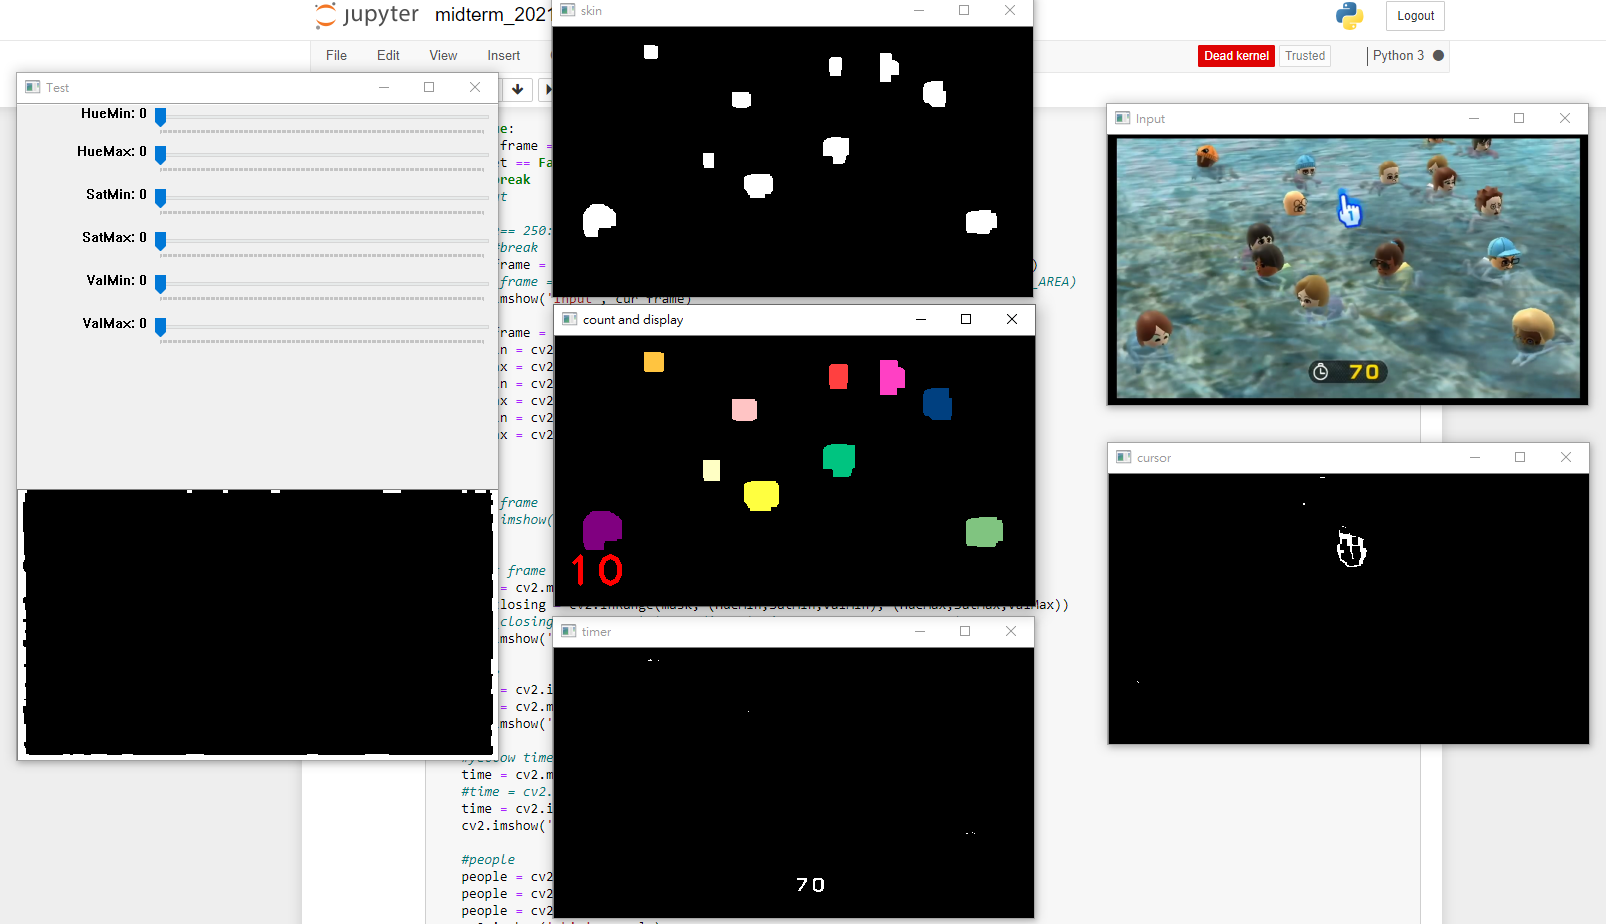

## <font color=#800000>Question 11</font>

###  Any comments regarding the midterm?
- No comments regarding to the midterm.

###  Which steps you believe you have completed?
- I believed I complete all steps in the midterm.

### Which steps bother you?
- The three steps of finding color(blue cursor, yellow timer and skin) bothers me a bit, especially for the detect human skin color step<br> 
- For detect human skin, since the people in the video has different skin color, so it is quite difficult to detected each person precisely. Some people with the dark or fair can not be detect perfectly.


## <font color=#800000>Question 12</font>

###  Any comments regarding the classes up to now?
- No comments regarding the classes up to now.

### Pace too fast or slow?
- Not too fast or slow.

### Quiz too hard or simple?
- Not too hard. But it would be much better if the notes for the Quiz(homework 1) can be more precise about telling us what to do in each step, like midterm.thats all~

### Prefer C or Python?
- Although c is faster but python is much more easy to use, so I prefer python.

## <font color=#800000>Some improvement can be done with more time</font>
- Find the better color range for human skin detection
- For the yellow timer detection, since the video has some color that are also yellow,so it would also count as the timer. So there might be a better color range just for the yellow timer.
- I uesd ramdom color for each individual skin region, but with random color, there might be some color that are very alike, such as light yellow and yellow. So it might be difficult for human eyes to tell the difference in the first place.(looks same but it's different)